In [1]:
# set working directory to same place ass app.py to import programs the same way as the app
import os
current_directory = os.getcwd()
if 'notebooks' in current_directory:
    parent_directory = os.path.abspath(os.path.join(current_directory, os.pardir))
    os.chdir(parent_directory)
os.getcwd()

'/Users/elisealstad/code/dataengineer-job-dash'

In [97]:
import pandas as pd
import gcsfs
import os



# Define the path to your GCS bucket and file
file_path_gcp = "gs://oslo-linkedin-dataengineer-jobs/transformed"

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"../service-account-details.json" 

df = pd.read_parquet(file_path_gcp)
df = df.replace({'seniority':{None:'Mid / not specified'}})

df



,jobid,job_type,pay,skills,seniority,date
0,3996220170,Data Analyst,NaN,"[finance, sql, analytics, machine learning, lo...",Mid / not specified,2024-08-09 06:57:52.657002
1,3996250713,Data Analyst,NaN,"[computer science, excel, exploratory data ana...",Junior,2024-08-09 06:57:52.657002
2,3994299447,Data Analyst,28.0,"[sql, jira, looker, support, mobile, advertising]",Junior,2024-08-09 06:57:52.657002
3,3996534267,Data Analyst,NaN,"[excel, specification, data processing, busine...",Mid / not specified,2024-08-09 06:57:52.657002
4,3996210737,Data Analyst,NaN,[business],Mid / not specified,2024-08-09 06:57:52.657002
...,...,...,...,...,...,...
59,3976661407,Data Scientist,150000.0,"[ai, data science, security, machine learning]",Lead,2024-08-09 07:03:18.882583
60,3989561562,Data Scientist,80000.0,"[machine learning, deep learning, segmentation...",Senior,2024-08-09 07:03:18.882583
61,3976664143,Data Scientist,125000.0,"[ai, data science, security, machine learning]",Lead,2024-08-09 07:03:18.882583
62,3887142791,Data Scientist,500.0,"[jupyter, computer science, machine learning, ...",Senior,2024-08-09 07:03:18.882583


In [64]:
filtered_df = df.query('job_type == @df.job_type.unique().tolist()[0]')
filtered_df = filtered_df.query('seniority == @df.seniority.unique().tolist()[0]')

start_date = "2023-02-01"
end_date = "2024-12-01"

# Filter the DataFrame
filtered_df = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]

ls_skills = df.explode('skills')['skills'].tolist()
filtered_df = filtered_df[filtered_df['skills'].map(lambda x: ls_skills[0] in x)]
df.explode('skills')['skills'].value_counts()


skills
business           60
python             58
sql                47
data science       45
support            41
                   ..
data validation     1
mysql               1
queue               1
interaction         1
peer to peer        1
Name: count, Length: 149, dtype: int64

In [86]:
from datetime import datetime
from datetime import date
df.date.max().date() < date.today()

False

In [60]:
[{'label': i, 'value': i} for i in df.job_type.unique().tolist()]
        

[{'label': 'Data Analyst', 'value': 'Data Analyst'},
 {'label': 'Data Engineer', 'value': 'Data Engineer'},
 {'label': 'Data Scientist', 'value': 'Data Scientist'},
 {'label': 'Data%20Scientist', 'value': 'Data%20Scientist'},
 {'label': 'Data%20Engineer', 'value': 'Data%20Engineer'}]

In [61]:
[{'label': i, 'value': i}for i in df.seniority.unique().tolist()]

[{'label': 'Mid / not specified', 'value': 'Mid / not specified'},
 {'label': 'Junior', 'value': 'Junior'},
 {'label': 'Senior', 'value': 'Senior'},
 {'label': 'Lead', 'value': 'Lead'},
 {'label': 'Manager', 'value': 'Manager'}]

In [58]:
filtered_df['date'].dt.date.unique().tolist()

[datetime.date(2024, 8, 9)]

In [42]:
# import polars as pl

coding_languages = [
    'python', 'javascript', 'java', 'c++', 'c#', 'php', 'ruby', 'swift', 'kotlin', 'typescript',
    'go', 'rust', 'sql', 'r', 'html', 'css', 'bash', 'perl', 'objective-c', 'scala',
    'lua', 'haskell', 'matlab', 'dart', 'visual basic .net', 'assembly language', 'f#', 'groovy', 'elixir', 'clojure',
    'erlang', 'julia', 'vbscript', 'lisp', 'prolog', 'scheme', 'ada', 'fortran', 'cobol', 'pascal',
    'racket', 'scratch', 'tcl', 'smalltalk', 'actionscript', 'awk', 'ocaml', 'pl/sql', 'sas', 'logo'
]
cloud_skills = {
    'aws': 'amazon web services',
    'gcp': 'google cloud platform',
    'azure': 'microsoft azure',
    'ibm': 'ibm cloud',
    'oci': 'oracle cloud',
    'sf': 'salesforce',
    'sap': 'sap cloud',
    'do': 'digitalocean'
}

# share job_type of filtered df
job_type_share = (filtered_df.job_type.value_counts(normalize=True) * 100).astype(int)

# Explode the 'skills' column and calculate value counts
skills_counts = pd.DataFrame(filtered_df.explode('skills')['skills'].value_counts())

# Calculate the total number of skills observations
total_skills = len(filtered_df)

skills_counts = pd.DataFrame(filtered_df.explode('skills')['skills'].value_counts())

skills_counts['percent'] = (((skills_counts['count'] / total_skills) * 100).astype(int))

# Filter coding languages and cloud skills
df_coding_languages = skills_counts[skills_counts.index.isin(coding_languages)].reset_index()
df_cloud_skills = skills_counts[skills_counts.index.isin(list(cloud_skills.values())+list((cloud_skills.keys())))]

# Replace cloud skill abbreviations with full names
df_cloud_skills = df_cloud_skills.rename(index=cloud_skills).reset_index()

# Display the dataframes
print("Coding Languages:")
print(df_coding_languages)
print("\nCloud Skills:")
print(df_cloud_skills)
print(job_type_share)
skills_counts




Coding Languages:
   skills  count  percent
0     sql      3       75
1  python      1       25

Cloud Skills:
Empty DataFrame
Columns: [skills, count, percent]
Index: []
job_type
Data Analyst    100
Name: proportion, dtype: int64


,count,percent
skills,,
finance,4,100
analytics,4,100
business,4,100
support,4,100
sql,3,75
tableau,2,50
excel,2,50
play,2,50
collaboration,2,50


In [ ]:
## Instead of count use share of jobs with skill

# also add one bar for job type

In [ ]:
fig = px.bar(df_coding_languages, x='skills', y='percent', title='Coding skills', labels={'skills': 'Skills', 'percent': 'Percentage of job applications'})
fig.update_yaxes(range=[0, 100])
fig.show()

In [88]:
job_type_share.reset_index()


,job_type,proportion
0,Data Analyst,100


In [96]:
import plotly
import plotly.express as px


fig = px.bar(job_type_share.reset_index(), x='job_type', y='proportion', title='Coding skills', labels={'skills': 'Skills', 'percent': 'Percentage of job applications'})
fig.update_yaxes(range=[0, 100])
fig.show()

In [39]:
fig = px.bar(df_cloud_skills, x='skills', y='percent', title='Desired experience with Cloud service provider', labels={'skills': 'Skills', 'percent': 'Percentage of job applications'})
fig.update_yaxes(range=[0, 100])
fig.show()

In [ ]:
fig = px.bar(df_cloud_skills, x='skills', y='percent', title='Desired experience with Cloud service provider', labels={'skills': 'Skills', 'percent': 'Percentage of job applications'})
fig.update_yaxes(range=[0, 100])
fig.show()

In [10]:
skills_counts


,count
skills,
finance,4
analytics,4
business,4
support,4
sql,3
tableau,2
excel,2
play,2
collaboration,2


In [87]:
skills_counts

skills,counts,percentage
str,u32,i16
"""segmentation""",1,17
"""looker""",1,17
"""nlp""",1,17
"""testing""",1,17
"""machine learning""",3,50
…,…,…
"""languages""",1,17
"""sql""",3,50
"""ml""",3,50


shape: (36, 3)
┌─────────────────────────┬────────┬────────────┐
│ skills                  ┆ counts ┆ percentage │
│ ---                     ┆ ---    ┆ ---        │
│ str                     ┆ u32    ┆ i16        │
╞═════════════════════════╪════════╪════════════╡
│ payments                ┆ 1      ┆ 17         │
│ pandas                  ┆ 1      ┆ 17         │
│ algorithm               ┆ 1      ┆ 17         │
│ artificial intelligence ┆ 1      ┆ 17         │
│ machine learning        ┆ 3      ┆ 50         │
│ …                       ┆ …      ┆ …          │
│ nlp                     ┆ 1      ┆ 17         │
│ aws                     ┆ 1      ┆ 17         │
│ monitoring              ┆ 2      ┆ 33         │
│ data science            ┆ 6      ┆ 100        │
│ segmentation            ┆ 1      ┆ 17         │
└─────────────────────────┴────────┴────────────┘


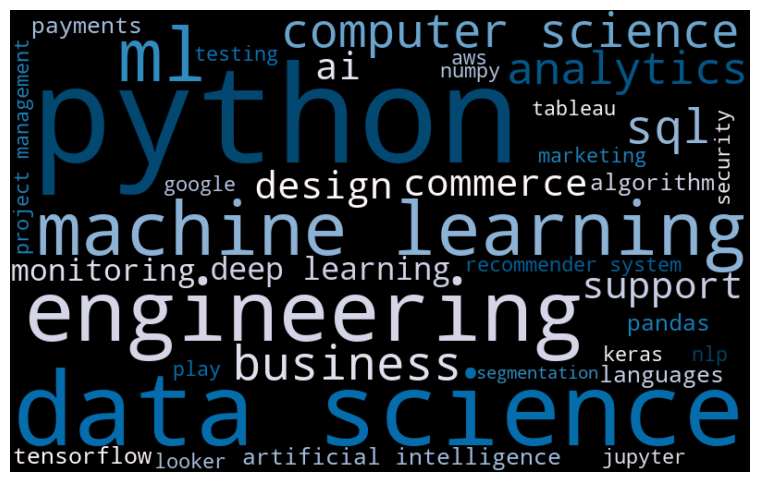

In [6]:
print(skills_counts)
word_count = dict(zip(skills_counts['skills'], skills_counts['counts']))

import base64
# Define a function to update the word cloud image
def update_word_cloud_from_frequencies(cleaned_word_count):
    wordcloud = WordCloud(
        background_color='black',
        contour_width=2,
        contour_color='black',
        colormap='PuBu',
        width=800,
        height=500
    ).generate_from_frequencies(cleaned_word_count)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig('word_cloud.png', bbox_inches='tight')
    
    # Encode the image in base64
    with open('word_cloud.png', 'rb') as img_file:
        encoded_image = base64.b64encode(img_file.read()).decode()

    return 'data:image/png;base64,{}'.format(encoded_image)

# Generate the word cloud and get the base64 encoded image string
encoded_image_str = update_word_cloud_from_frequencies(word_count)

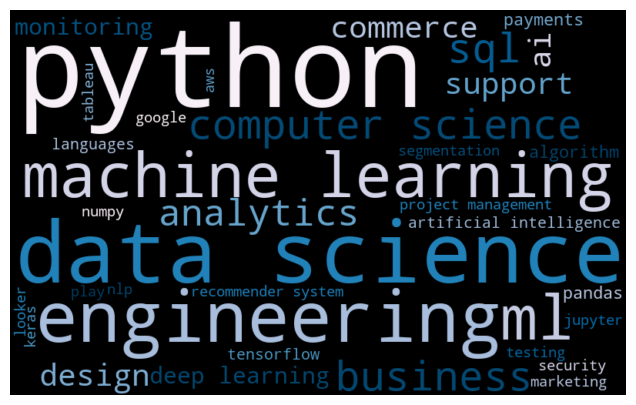

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_count = dict(zip(skills_counts['skills'], skills_counts['counts']))
wordcloud = WordCloud(background_color = 'black', contour_width = 2,
     contour_color = 'black', colormap = 'PuBu', width = 800, height = 500).generate_from_frequencies(word_count)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# # Convert the matplotlib figure to a Plotly figure
# fig = px.imshow(wordcloud, template='plotly_white')
# fig.update_layout(title='Word Cloud Visualization')

# # Show the plot
# fig.show()

In [ ]:
df = gdf
print(df)

# Apply filters
if filter1:
    print(filter1)
    df = df[df['job_type'].isin(filter1)]
    print('jobtype', df)
if filter2:
    df = df[df['seniority'].isin(filter2)]
    print('seniority', df)
if start_date and end_date:
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date) + pd.Timedelta(days=1)
    df['date'] = pd.to_datetime(df['date'])
    print(start_date, end_date)
    df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    print('date',df)
if filter4:
    print(filter4)
    df = df[df['skills'].map(lambda x: all(skill in x for skill in filter4))]
    
    print('skill', df)
print('filtered', df)
# Define coding languages and cloud skills
coding_languages = [
    'python', 'javascript', 'java', 'c++', 'c#', 'php', 'ruby', 'swift', 'kotlin', 'typescript',
    'go', 'rust', 'sql', 'r', 'html', 'css', 'bash', 'perl', 'objective-c', 'scala',
    'lua', 'haskell', 'matlab', 'dart', 'visual basic .net', 'assembly language', 'f#', 'groovy', 'elixir', 'clojure',
    'erlang', 'julia', 'vbscript', 'lisp', 'prolog', 'scheme', 'ada', 'fortran', 'cobol', 'pascal',
    'racket', 'scratch', 'tcl', 'smalltalk', 'actionscript', 'awk', 'ocaml', 'pl/sql', 'sas', 'logo'
]
cloud_skills = {
    'aws': 'amazon web services',
    'gcp': 'google cloud platform',
    'azure': 'microsoft azure',
    'ibm': 'ibm cloud',
    'oci': 'oracle cloud',
    'sf': 'salesforce',
    'sap': 'sap cloud',
    'do': 'digitalocean'
}

job_type_share = (df.job_type.value_counts(normalize=True) * 100).astype(int)
# Explode the 'skills' column and calculate value counts\
skills_counts = pd.DataFrame(df.explode('skills')['skills'].value_counts())

total_skills = len(df)
skills_counts['percent'] = ((skills_counts['count'] / total_skills) * 100).astype(int)

# Filter coding languages and cloud skills
df_coding_languages = skills_counts[skills_counts.index.isin(coding_languages)].reset_index()
df_cloud_skills = skills_counts[skills_counts.index.isin(list(cloud_skills.values()) + list(cloud_skills.keys()))].reset_index()
print(df_coding_languages)
# print()


# Create the bar chart
fig = px.bar(df_coding_languages, x='skills', y='percent', title='Coding skills', labels={'index': 'Skills', 'percent': 'Percentage of job applications'})
fig.update_yaxes(range=[0, 100])
fig.update_layout(plot_bgcolor='#010103',
                showlegend=False,
                template='plotly_dark',
                paper_bgcolor='#010103',
                font=dict(
                    family='Poppins, sans-serif',  # Apply Poppins font
                    size=14,  # Set the default font size (adjust as needed)
                    color='white'  # Set the font color
                )
                )

fig2 = px.bar(df_cloud_skills, x='skills', y='percent', title='Desired experience with Cloud service provider', labels={'index': 'Skills', 'percent': 'Percentage of job applications'})
fig2.update_yaxes(range=[0, 100])
fig2.update_layout(plot_bgcolor='#010103',
                showlegend=False,
                template='plotly_dark',
                paper_bgcolor='#010103',
                font=dict(
                    family='Poppins, sans-serif',  # Apply Poppins font
                    size=14,  # Set the default font size (adjust as needed)
                    color='white'  # Set the font color
                )
                )



In [2]:
import polars as pl
import os
from google.cloud import storage
import gcsfs

# Set up Google Cloud Storage credentials
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"../../service-account-details.json" 


# Define the path to your GCS bucket and file
file_path_gcp = "gs://oslo-linkedin-dataengineer-jobs/transformed/*.parquet"

# Load the Parquet file into a Polars DataFrame
df = pl.read_parquet(file_path_gcp)


df = df.with_columns(
    pl.when(pl.col("seniority").is_null())
    .then(pl.lit("Mid / not specified"))
    .otherwise(pl.col("seniority"))
    .alias("seniority")
    )


In [3]:
import polars as pl
from datetime import datetime, timedelta

# Define the filters
filter1 = ["Data Scientist"]
filter2 = ["Senior"]
start_date = (datetime.now() - timedelta(days=2)).strftime('%Y-%m-%d')
end_date = datetime.now().strftime('%Y-%m-%d')
filter4 = ["python"]

# Apply filters
if filter1:
    print(filter1)
    df = df.filter(pl.col("job_type").is_in(filter1))
    print('jobtype', df)

if filter2:
    df = df.filter(pl.col("seniority").is_in(filter2))
    print('seniority', df)

if start_date and end_date:
    start_date = datetime.strptime(start_date, '%Y-%m-%d')
    end_date = datetime.strptime(end_date, '%Y-%m-%d') + timedelta(days=1)
    df = df.filter((pl.col("date") >= start_date) & (pl.col("date") < end_date))
    print('date', df)

if filter4:
    print(filter4)
    df = df.filter(
        df['skills'].map_elements(lambda x: all(skill in x for skill in filter4), return_dtype=pl.List(pl.String))
    )
    print('skill', df)

print('filtered', df)

# Define coding languages and cloud skills
coding_languages = [
    'python', 'javascript', 'java', 'c++', 'c#', 'php', 'ruby', 'swift', 'kotlin', 'typescript',
    'go', 'rust', 'sql', 'r', 'html', 'css', 'bash', 'perl', 'objective-c', 'scala',
    'lua', 'haskell', 'matlab', 'dart', 'visual basic .net', 'assembly language', 'f#', 'groovy', 'elixir', 'clojure',
    'erlang', 'julia', 'vbscript', 'lisp', 'prolog', 'scheme', 'ada', 'fortran', 'cobol', 'pascal',
    'racket', 'scratch', 'tcl', 'smalltalk', 'actionscript', 'awk', 'ocaml', 'pl/sql', 'sas', 'logo'
]
cloud_skills = {
    'aws': 'amazon web services',
    'gcp': 'google cloud platform',
    'azure': 'microsoft azure',
    'ibm': 'ibm cloud',
    'oci': 'oracle cloud',
    'sf': 'salesforce',
    'sap': 'sap cloud',
    'do': 'digitalocean'
}



['Data Scientist']
jobtype shape: (23, 6)
┌────────────┬────────────────┬──────────┬───────────────────────────┬───────────┬─────────────────┐
│ jobid      ┆ job_type       ┆ pay      ┆ skills                    ┆ seniority ┆ date            │
│ ---        ┆ ---            ┆ ---      ┆ ---                       ┆ ---       ┆ ---             │
│ str        ┆ str            ┆ f64      ┆ list[str]                 ┆ str       ┆ datetime[μs]    │
╞════════════╪════════════════╪══════════╪═══════════════════════════╪═══════════╪═════════════════╡
│ 3995689280 ┆ Data Scientist ┆ null     ┆ ["algorithms", "finance", ┆ Mid / not ┆ 2024-08-09      │
│            ┆                ┆          ┆ … "p…                     ┆ specified ┆ 07:03:18.882583 │
│ 3996291097 ┆ Data Scientist ┆ 55.0     ┆ ["algorithms", "sql", …   ┆ Mid / not ┆ 2024-08-09      │
│            ┆                ┆          ┆ "suppo…                   ┆ specified ┆ 07:03:18.882583 │
│ 3995395648 ┆ Data Scientist ┆ 80.0     ┆ ["pand

In [40]:
# Calculate job type share (percentage of each job type)

def make_tables(df):
    total_job_postings = len(df)

    job_type_share = df['job_type'].value_counts().with_columns(
        (pl.col("count").alias("counts") / total_job_postings * 100).alias("percentage").round(0).cast(pl.Int16)
    ).with_columns([
    pl.col("job_type").str.to_titlecase().alias("job_type")
    ])
    # Explode the 'skills' column and calculate value counts
    skills_counts = df.explode("skills").group_by("skills").len(name="counts").with_columns(
        (pl.col("counts") / total_job_postings * 100).alias("percentage").round(0).cast(pl.Int16)
    ).with_columns([
    pl.col("skills").str.to_titlecase().alias("skills")
    ])

    # make dfs for coding languages and cloud 
    df_coding_languages = skills_counts.filter(pl.col("skills").is_in(coding_languages))
    df_cloud_skills = skills_counts.filter(pl.col("skills").is_in(list(cloud_skills.values()) + list(cloud_skills.keys())))

    return job_type_share, df_coding_languages, df_cloud_skills, skills_counts
job_type_share, df_coding_languages, df_cloud_skills, skills_counts = make_tables(df)


In [42]:
skills_counts

skills,counts,percentage
str,u32,i16
"""Project Management""",1,17
"""Nlp""",1,17
"""Keras""",1,17
"""Security""",1,17
"""Business""",3,50
…,…,…
"""Python""",6,100
"""Data Science""",6,100
"""Google""",1,17


In [63]:
df_cloud_skills

skills,counts,percentage
str,u32,i16
"""aws""",1,17


In [81]:
job_type_share

job_type,count,percentage
str,u32,i16
"""Data Scientist""",6,100


In [84]:
import plotly.express as px

def create_bar_chart(x, y, title, x_label = 'skill(s)'):
    fig = px.bar(x=x, y=y, title=title)
    fig.update_yaxes(range=[0, 100])
    fig.update_layout(
        plot_bgcolor='#010103',
        showlegend=False,
        template='plotly_dark',
        paper_bgcolor='#010103',
        font=dict(
            family='Poppins, sans-serif',  # Apply Poppins font
            size=14,  # Set the default font size (adjust as needed)
            color='white'  # Set the font color
        ), 
        title={
            'text': f"{title}<br><span style='font-size:10px;'>The figure shows the percentage of job applications requiring the skill(s)</span>",
        }
    )
    fig.update_xaxes(title_text=x_label)  # Explicitly set the x-axis label
    fig.update_yaxes(title_text='% of job postings'    
                    ,title_font=dict(
        family='Poppins, sans-serif',  # Font family
        size=12,  # Font size (adjust as needed)
        color='white'))  # Font color)  # Explicitly set the y-axis label)
    return fig

# Create the first bar chart
fig_code = create_bar_chart(
    x=df_coding_languages['skills'],
    y=df_coding_languages['percentage'],
    title='Coding language required',
)

# Create the second bar chart
fig_cloud = create_bar_chart(
    x=df_cloud_skills['skills'],
    y=df_cloud_skills['percentage'],
    title='Desired experience with Cloud service provider',
)

# Create the second bar chart
fig_job_type = create_bar_chart(
    x=job_type_share['job_type'],
    y=df_cloud_skills['percentage'],
    title='Job type of job posting',
    x_label='job type',
)

fig_job_type.show()
fig_cloud.show()


In [50]:
import plotly.express as px

def make_treemap(skills_counts):
    skills_counts_dict = {
        "skills": skills_counts["skills"].to_list(),
        "percentage": skills_counts["percentage"].to_list()
    }

    # Create a treemap using Plotly
    treemap = px.treemap(
        skills_counts_dict,
        path=['skills'],  # This creates the hierarchical path
        values='percentage',
        color='percentage',  # Optional: color by frequency
        color_continuous_scale='Blues',  # Optional: color scale
        height=600,  # Adjust height as needed
    )
    # Update layout to apply black background and Poppins font
    treemap.update_layout(
        plot_bgcolor='#010103',  # Background color of the plot
        paper_bgcolor='#010103',  # Background color of the paper
        font=dict(
            family='Poppins, sans-serif',  # Apply Poppins font
            size=18,  # Set the default font size
            color='white'  # Set the font color
        ),
        title={
                'text': f"<br><span style='font-size:14px;'>Hover over the skills below to see the percentage of job postings that mention the skill</span>",
            }, 
        coloraxis_showscale=False 
    )

    treemap.update_traces(
        hovertemplate='<b>Skill</b>: %{label}<br><b>Percent</b>: %{value}<extra></extra>'
    )

    # Show the plot
    return treemap